# Projet Optimisation Numérique

<center> Abdel-Kader Kaba <center>

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import linalg as LA
import scipy.stats as si
import sympy as sy
from sympy.stats import Normal, cdf
import seaborn as sns
sns.set_style('darkgrid')
from copy import copy
import matplotlib.patches as mpatches
import random

# Exercice 1

## Q2 (Q5)

In [108]:
n = 10
h = 1/(n+1)
f = np.ones(n)
b = h*f
A = np.zeros((n,n))
for i in range(1,n-1):
    A[i][i] = 2/h
    A[i][i-1] = -1/h
    A[i][i+1] = -1/h
A[0][0] = 2/h
A[0][1] = -1/h
A[n-1][n-2] = -1/h
A[n-1][n-1] = 2/h

In [109]:
u_bar = np.linalg.solve(A,b)

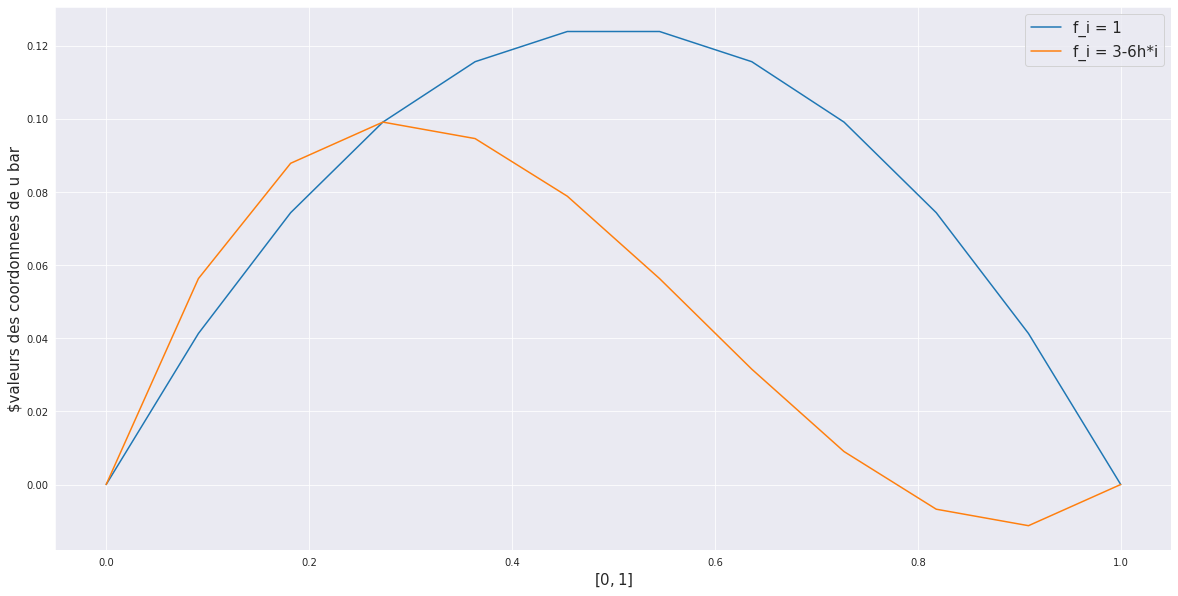

In [110]:
ih_list = [i*h for i in range(n+2)]
y_coord = np.concatenate((np.array([0]),u_bar,np.array([0])))
f2 = np.array([3-6*h*i for i in range(n)])
b2 = h*f2
u_bar2 = LA.solve(A,b2)
ih_list2 = [i*h for i in range(n+2)]
y_coord2 = np.concatenate((np.array([0]),u_bar2,np.array([0])))

plt.figure(figsize=(20,10))
plt.xlabel('$[0,1]$',size=15)
plt.ylabel('$valeurs des coordonnees de u bar',size=15)
plt.plot(ih_list,y_coord,label="f_i = 1")
plt.plot(ih_list2,y_coord2,label="f_i = 3-6h*i")
plt.legend(fontsize=15)
plt.show()

## Q3 (Q5)

In [111]:
def grad_J(u,f):
    n = len(u)
    h = 1/(n+1)
    GrdF = np.zeros((n))
    for i in range(1,n-1):
        GrdF[i] = -(1/h)*(u[i-1]+u[i+1]) + (2/h)*u[i] - h*f[i]
    GrdF[0] = (2/h)*u[0] - (1/h)*u[1] - h*f[0]
    GrdF[n-1] = (2/h)*u[n-1] - (1/h)*u[n-2] -h*f[n-1]
    return GrdF

In [112]:
#u = np.random.random(10)
u = np.ones(10)
f = np.ones(10)

In [113]:
#methode de gradient a pas constants
def gradient_descent(x0,tau,eta,IterMax):
    x = x0
    n = len(x)
    f = np.ones(n)
    gradient = grad_J(x,f)
    counter = 0
    while LA.norm(gradient)>eta and counter<IterMax:
        #import ipdb;ipdb.set_trace()
        x = x-tau*gradient
        gradient = grad_J(x,f)
        counter+=1
    return x,counter

In [114]:
def gradient_descent2(x0,tau,eta,IterMax):
    x = x0
    n = len(x)
    f = np.array([3-6*h*i for i in range(n)])
    gradient = grad_J(x,f)
    counter = 0
    while LA.norm(gradient)>eta and counter<IterMax:
        #import ipdb;ipdb.set_trace()
        x = x-tau*gradient
        gradient = grad_J(x,f)
        counter+=1
    return x,counter

In [115]:
%%time
tau_ = np.linspace(0.01,0.07,300)
nbr_iter = []
nbr_iter2 = []
for elmt in tau_:
    nbr_iter.append(gradient_descent(u,elmt,1e-4,1000)[1])
    nbr_iter2.append(gradient_descent2(u,elmt,1e-4,1000)[1])
len(nbr_iter)

CPU times: user 14.5 s, sys: 685 ms, total: 15.2 s
Wall time: 14.5 s


300

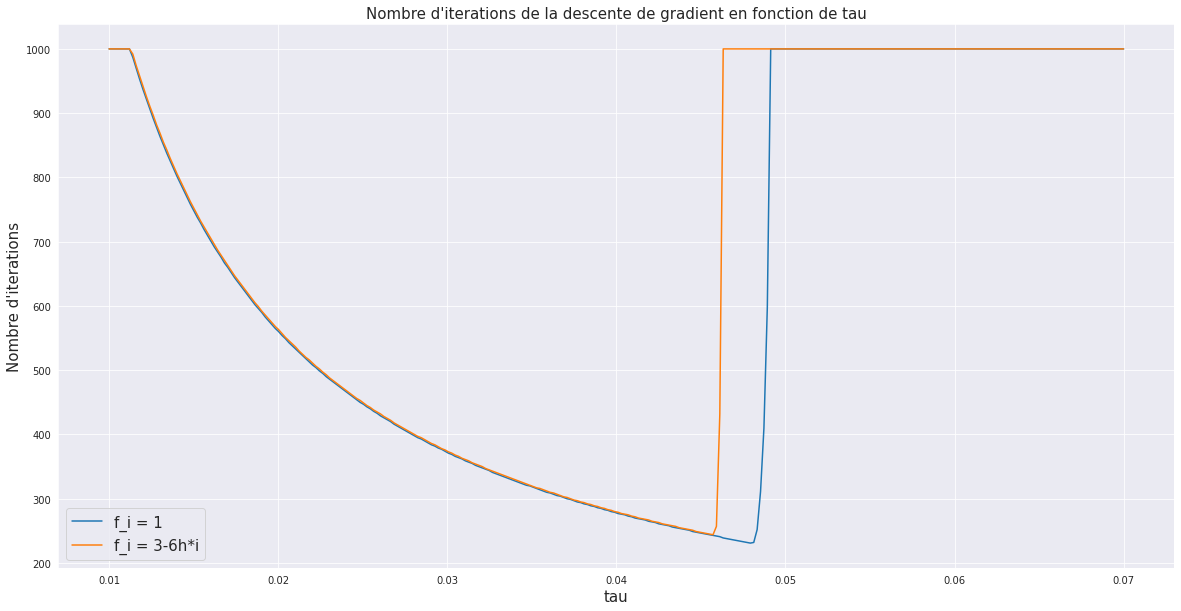

In [116]:
#function plot
plt.figure(figsize=(20,10))
plt.plot(tau_,nbr_iter,label="f_i = 1")
plt.plot(tau_,nbr_iter2,label="f_i = 3-6h*i")
plt.xlabel('tau',size=15)
plt.ylabel("Nombre d'iterations",size=15)
plt.title("Nombre d'iterations de la descente de gradient en fonction de tau",size=15)
plt.legend(fontsize=15)
plt.show()

### Commentaires sur la convergence par rapport a $\tau$

La valeur de $\tau$ qui conduit au plus petit nombre d'interation (f_i = 1) est: 

In [117]:
print(tau_[np.where(nbr_iter==np.amin(nbr_iter))[0][0]])

0.04792642140468228


La valeur de $\tau$ qui conduit au plus petit nombre d'interation (f_i = 3-6h*i) est: 

In [118]:
print(tau_[np.where(nbr_iter==np.amin(nbr_iter2))[0][0]])

0.04551839464882944


Le plus petit nombre d'iterations (f_i = 1) est:

In [119]:
print(np.amin(nbr_iter))

231


Le plus petit nombre d'iterations (f_i = 3-6h*i) est:

In [120]:
print(np.amin(nbr_iter2))

244


Valeur minimale de tau pour lequel l'algorithme n'a pas convergé (f_i=1):

In [121]:
print(tau_[np.where(nbr_iter==np.amax(nbr_iter))[0][0]])

0.01


Il commence à ne plus converger à partir de (f_i = 1):

In [122]:
print(tau_[np.where(nbr_iter==np.amax(nbr_iter))[0][7]])

0.0491304347826087


Valeur maximale de tau pour lequel l'algorithme n'a pas convergé (f_i=1):

In [123]:
print(tau_[np.where(nbr_iter==np.amax(nbr_iter))[0][-1]])

0.07


Valeur minimale de tau pour lequel l'algorithme n'a pas convergé (f_i = 3-6h*i):

In [124]:
print(tau_[np.where(nbr_iter2==np.amax(nbr_iter2))[0][0]])

0.01


Il commence à ne plus converger à partir de (f_i = 3-6h*i):

In [125]:
print(tau_[np.where(nbr_iter2==np.amax(nbr_iter2))[0][7]])

0.04632107023411371


Valeur maximale de tau pour lequel l'algorithme n'a pas convergé (f_i = 3-6h*i):

In [126]:
print(tau_[np.where(nbr_iter2==np.amax(nbr_iter2))[0][-1]])

0.07


D'apres une etude theorique l'algorithme converge lorsqu'on a $\tau \in [\beta_1,\beta_2]$. Avec $0 <\beta_1 < \beta_2 < \frac{2}{M}$ où M est une constante de Lipschitz du gradient de J

On constate effectivement qu'a partir d'un certain $\tau_1$, l'algorithme ne converge plus. Alors on a que $\tau_1 >\frac{2}{M}$. Dans notre cas ce $\tau_1$ semble se situer autour de $0.0491$ pour $f_{i}=1$ et autour de $0.0463$ pour $f_{i}=3-6hi$

## Q4 (Q5)

On fait varier les differents parametres: $n$,$\tau$,$\eta$, $\text{IterMax}$ et on observe le comportement de l'erreur $\bar{u} - \tilde{u}$

In [127]:
def matrix_sym(dim):
    h = 1/(dim+1)
    A = np.zeros((dim,dim))
    for i in range(1,dim-1):
        A[i][i] = 2/h
        A[i][i-1] = -1/h
        A[i][i+1] = -1/h
    A[0][0] = 2/h
    A[0][1] = -1/h
    A[dim-1][dim-2] = -1/h
    A[dim-1][dim-1] = 2/h
    return A

In [128]:
u = np.ones(10)
f = np.ones(10)
iterations = np.arange(100,300)
dimensions = np.arange(5,12)
steps = np.linspace(0.01,0.07,25)
tolerance = np.array([1e-6,1e-5,1e-4,1e-3])
error_evol1 = []
error_evol2 = []
error_evol3 = []
error_evol4 = []
#on fait varier le nombre d'iterations
for elm in iterations:
    error_evol1.append(LA.norm(u_bar-gradient_descent(u,0.04,1e-6,elm)[0]))
#on fait varier la dimension
for elm in dimensions:
    init_param = np.ones(elm)
    solu = np.linalg.solve(matrix_sym(elm),(1/(elm+1))*np.ones(elm))
    error_evol2.append(LA.norm(solu-gradient_descent(init_param,0.04,1e-4,1000)[0]))
# #on fait varier le pas tau
for elm in steps:
    error_evol3.append(LA.norm(u_bar-gradient_descent(u,elm,1e-4,1000)[0]))
# #on fait varier la tolerance
for elm in tolerance:
    error_evol4.append(LA.norm(u_bar-gradient_descent(u,0.04,elm,1000)[0]))

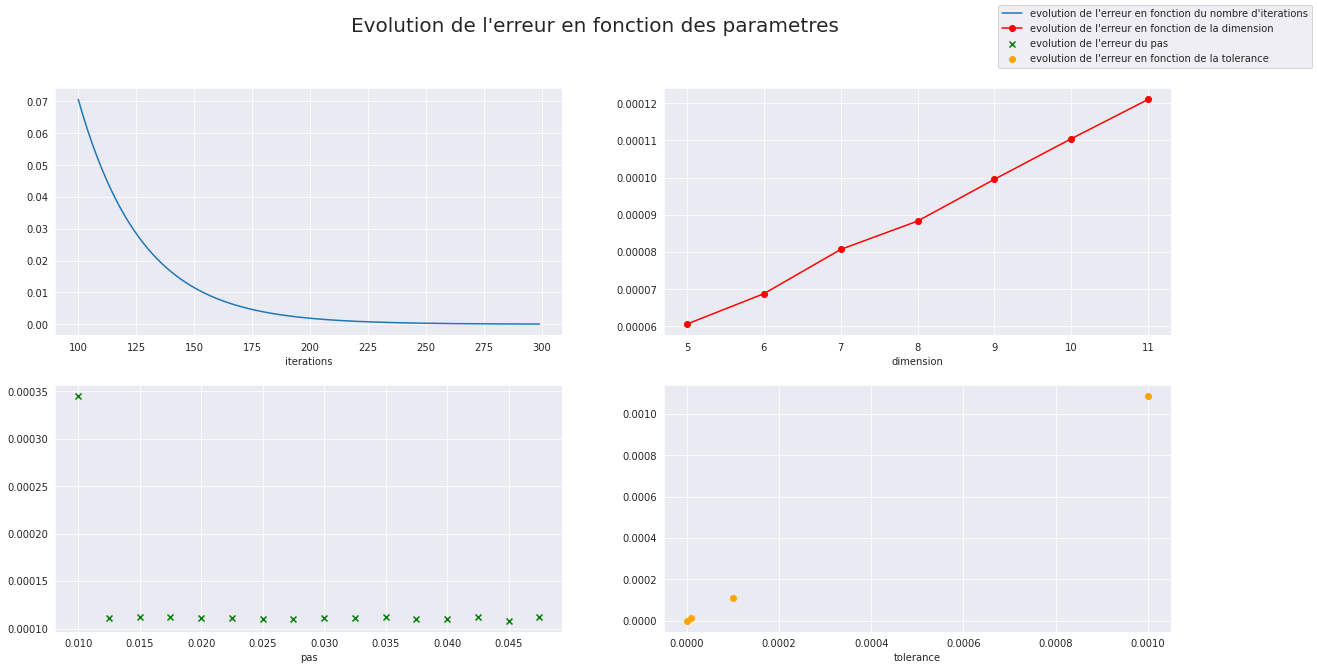

In [129]:
fig,axs = plt.subplots(2,2,figsize=(20,10))
axs[0,0].plot(iterations,error_evol1,label="evolution de l'erreur en fonction du nombre d'iterations")
axs[0,0].set_xlabel('iterations')
axs[0,1].plot(dimensions,error_evol2,label="evolution de l'erreur en fonction de la dimension",color='red',marker='o')
axs[0,1].set_xlabel('dimension')
axs[1,0].scatter(steps[:-9],error_evol3[:-9],label="evolution de l'erreur du pas",color='green',marker='x')
axs[1,0].set_xlabel('pas')
axs[1,1].scatter(tolerance,error_evol4,label="evolution de l'erreur en fonction de la tolerance",color='orange')
axs[1,1].set_xlabel('tolerance')
fig.legend()
fig.suptitle("Evolution de l'erreur en fonction des parametres",fontsize = 20)
plt.show()

# Exercice 2

## Methode de Penalisation 1

### a)

In [130]:
#calcul du gradient
def init_func(x):
    return 1-((1-x)**10)

def grad_He(x,y,eps):
    r = 0.2
    a = 0.5
    b = 0.6
    n = len(x)
    h = (1/n)
    Grd_H = np.zeros((2,n))
    Grd_R = np.zeros((2,n))
    for i in range(1,n-1):
        Grd_H[0][i] = (2/h)*x[i] - (1/h)*(x[i-1]+x[i+1])
        Grd_H[1][i] = (2/h)*y[i] - (1/h)*(y[i-1]+y[i+1])
    Grd_H[0][0] = (2/h)*x[0] - (1/h)*x[1]
    Grd_H[0][n-1] = (2/h)*x[n-1] - (1/h)*x[n-2] - (1/h)
    Grd_H[1][0] = (2/h)*y[0] - (1/h)*y[1]
    Grd_H[1][n-1] = (2/h)*y[n-1] - (1/h)*y[n-2] - (1/h)
    for i in range(n):
        temp = (r**2) - ((x[i]-a)**2) - ((y[i]-b)**2)
        Grd_R[0][i] = (h/2)*2*max(0,temp)*max(0,(-2*(x[i]-a)))
        Grd_R[1][i] = (h/2)*2*max(0,temp)*max(0,(-2*(y[i]-b))) 
    res = Grd_H + (1/eps)*Grd_R
    return res

In [131]:
#methode du gradient 
def gradient_descentHe(x0,y0,eps,tau,eta,IterMax):
    x = x0
    y = y0
    n = len(x)
    gradient = grad_He(x,y,eps)
    counter = 0
    while LA.norm(gradient)>eta and counter<IterMax:
        #import ipdb;ipdb.set_trace()
        x = x-tau*gradient[0]
        y = y - tau*gradient[1]
        gradient = grad_He(x,y,eps)
        counter+=1
    return x,y,counter

In [132]:
N = 30
x_knot = np.array([i/30 for i in range(1,N)])
y_knot = ys = np.array([init_func(elm) for elm in x_knot])

In [133]:
#calcul des y
Iter = 1000
tau = 0.01
eta = 1e-4
xs1 = gradient_descentHe(x_knot,y_knot,1e-2,tau,eta,Iter)[0]
ys1 = gradient_descentHe(x_knot,y_knot,1e-2,tau,eta,Iter)[1]

xs2 = gradient_descentHe(x_knot,y_knot,1e-3,tau,eta,Iter)[0]
ys2 = gradient_descentHe(x_knot,y_knot,1e-3,tau,eta,Iter)[1]

xs3 = gradient_descentHe(x_knot,y_knot,1e-4,tau,eta,Iter)[0]
ys3 = gradient_descentHe(x_knot,y_knot,1e-4,tau,eta,Iter)[1]

xs4 = gradient_descentHe(x_knot,y_knot,1e-5,tau,eta,Iter)[0]
ys4 = gradient_descentHe(x_knot,y_knot,1e-5,tau,eta,Iter)[1]

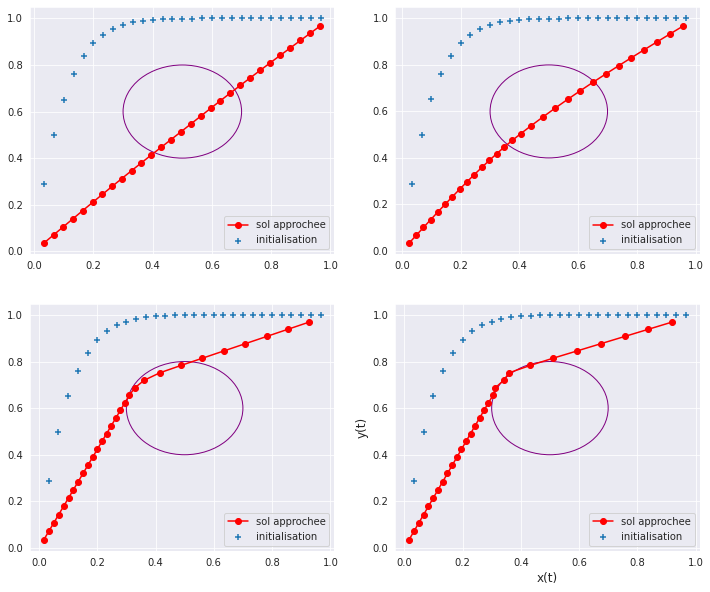

In [134]:
#graphe

fig,axs = plt.subplots(2,2,figsize=(12,10))

circle = mpatches.Circle((0.5,0.6),radius = 0.2,fill=False,color='purple')
c2 = copy(circle)
c3 = copy(circle)
c4 = copy(circle)

axs[0,0].add_artist(circle)
axs[0,0].scatter(x_knot,y_knot,marker='+',label='initialisation')
axs[0,0].plot(xs1,ys1,marker='o',color='red',label='sol approchee')
axs[0,0].legend()

axs[0,1].add_artist(c2)
axs[0,1].scatter(x_knot,y_knot,marker='+',label='initialisation')
axs[0,1].plot(xs2,ys2,marker='o',color='red',label='sol approchee')
axs[0,1].legend()

axs[1,0].add_artist(c3)
axs[1,0].scatter(x_knot,y_knot,marker='+',label='initialisation')
axs[1,0].plot(xs3,ys3,marker='o',color='red',label='sol approchee')
axs[1,0].legend()

axs[1,1].add_artist(c4)
axs[1,1].scatter(x_knot,y_knot,marker='+',label='initialisation')
axs[1,1].plot(xs4,ys4,marker='o',color='red',label='sol approchee')
axs[1,1].legend()
plt.xlabel('x(t)',size = 12)
plt.ylabel('y(t)',size = 12)

plt.show()

### b)

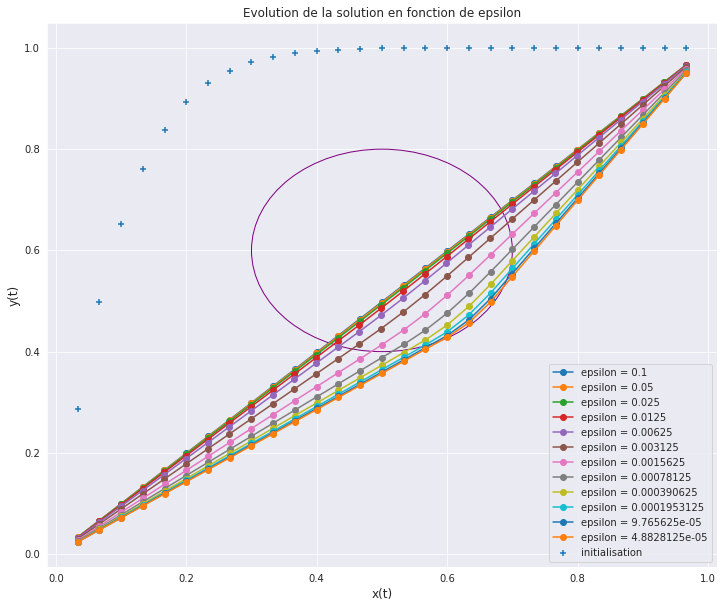

In [135]:
##b
Iter = 5000
tau = 0.01
eta = 1e-4
eps = 1e-1
xs = x_knot
ys = y_knot
circle = mpatches.Circle((0.5,0.6),radius = 0.2,fill=False,color='purple')
fig,ax = plt.subplots(figsize=(12,10))
plt.scatter(xs,ys,label='initialisation',marker='+')
plt.xlabel('x(t)',size = 12)
plt.ylabel('y(t)',size = 12)
plt.title('Evolution de la solution en fonction de epsilon')
ax.add_artist(circle)
for i in range(12):
    xs,ys,count = gradient_descentHe(xs,ys,eps,tau,eta,Iter)
    plt.plot(xs,ys,label='epsilon = {}'.format(eps),marker='o')
    plt.legend()
    eps /= 2

### Commentaires 

On essaie de trouver un paramètre de pénalisation $\epsilon$ pour lequel notre solution respecte la contrainte. On commence notre expérience avec $\epsilon = 0.1$ et ensuite on le divise par 2. On voit qu'à chaque pas on se rapproche d'un epsilon pour lequel la solution donnée par l'algorithme respecte la contrainte.

## Methode de Penalisation 2

In [136]:
def grad_Ge(x,y,alph):
    r = 0.2
    a = 0.5
    b = 0.6
    n = len(x)
    h = (1/n)
    Grd_H = np.zeros((2,n))
    Grd_L = np.zeros((2,n))
    for i in range(1,n-1):
        Grd_H[0][i] = (2/h)*x[i] - (1/h)*(x[i-1]+x[i+1])
        Grd_H[1][i] = (2/h)*y[i] - (1/h)*(y[i-1]+y[i+1])
    Grd_H[0][0] = (2/h)*x[0] - (1/h)*x[1]
    Grd_H[0][n-1] = (2/h)*x[n-1] - (1/h)*x[n-2] - (1/h)
    Grd_H[1][0] = (2/h)*y[0] - (1/h)*y[1]
    Grd_H[1][n-1] = (2/h)*y[n-1] - (1/h)*y[n-2] - (1/h)
    temp = ((x-a)**2) + ((y-b)**2) - (r**2) 
    Grd_L[0] = (h/2)*((2*(x-a))/temp)
    Grd_L[1] = (h/2)*((2*(y-b))/temp)
    res = Grd_H - alph*Grd_L
    return res

In [137]:
def gradient_descentGe(x0,y0,alph,tau,eta,IterMax):
    x = x0
    y = y0
    n = len(x)
    gradient = grad_Ge(x,y,alph)
    counter = 0
    while LA.norm(gradient)>eta and counter<IterMax:
        #import ipdb;ipdb.set_trace()
        x = x-tau*gradient[0]
        y = y - tau*gradient[1]
        gradient = grad_Ge(x,y,alph)
        counter+=1
    return x,y,counter

In [138]:
N = 30
Iter = 1000
tau = 0.01
eta = 1e-4
res_x,res_y,co = gradient_descentGe(x_knot,y_knot,0.12,tau,eta,Iter)

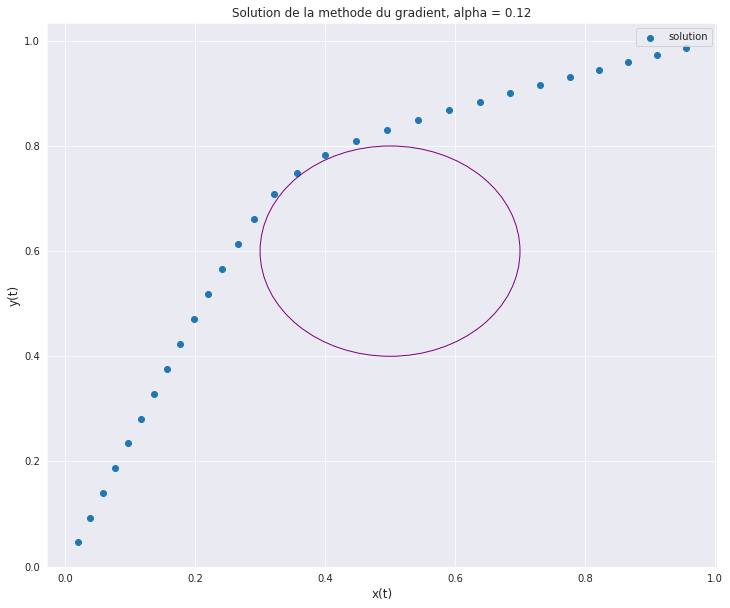

In [139]:
fig,axs = plt.subplots(figsize=(12,10))
circle = mpatches.Circle((0.5,0.6),radius = 0.2,fill=False,color='purple')
axs.add_artist(circle)
plt.scatter(res_x,res_y,label='solution')
plt.xlabel('x(t)',size = 12)
plt.ylabel('y(t)',size = 12)
plt.legend()
plt.title('Solution de la methode du gradient, alpha = 0.12')
plt.show()

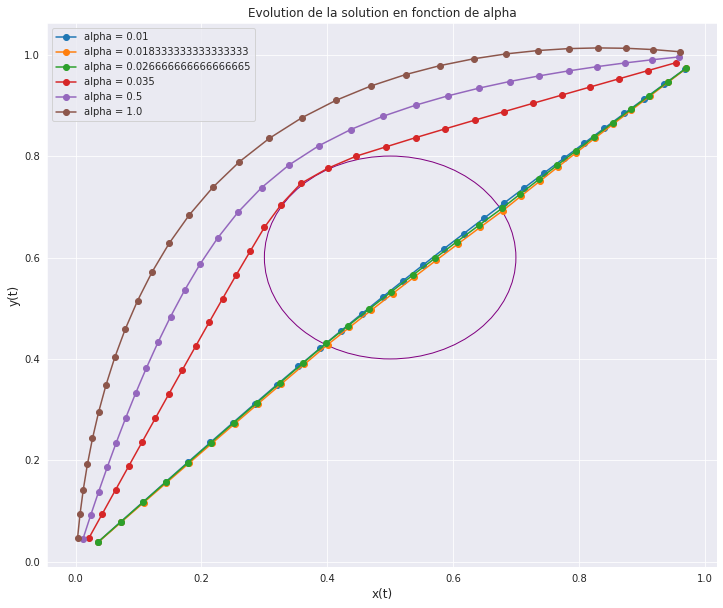

In [140]:
##b
Iter = 1000
tau = 0.01
eta = 1e-4
alph_list = np.concatenate((np.linspace(0.01,0.035,4),np.array([0.5]),np.array([1])))
circle = mpatches.Circle((0.5,0.6),radius = 0.2,fill=False,color='purple',label='obstacle')
fig,ax = plt.subplots(figsize=(12,10))
plt.xlabel('x(t)',size = 12)
plt.ylabel('y(t)',size = 12)
plt.title('Evolution de la solution en fonction de alpha')
ax.add_artist(circle)
for alph in alph_list:
    xs,ys,count = gradient_descentGe(x_knot,y_knot,alph,tau,eta,Iter)
    plt.plot(xs,ys,label='alpha = {}'.format(alph),marker='o')
plt.legend()
plt.show()

### Commentaires

La solution passe a l'interieur de l'obstacle jusqu'a ce que la penalisation soit trop grande (autour de 0.035) elle sort de l'obstacle et s'eloigne de plus en plus

## Comparaison des methodes de Penalisation

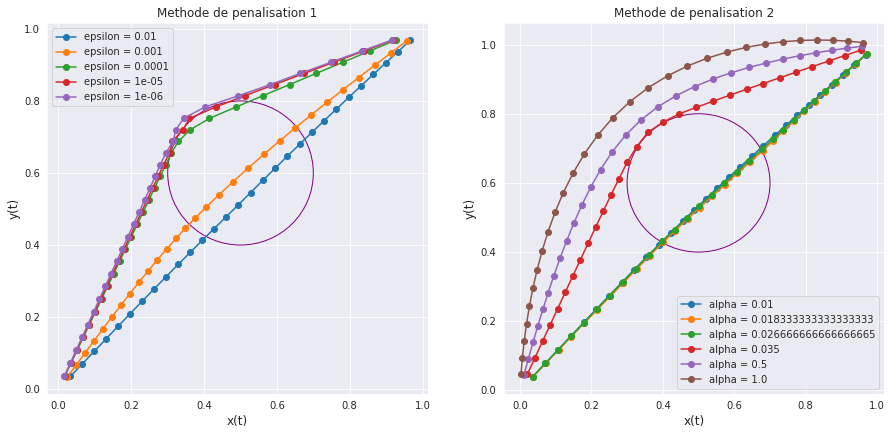

In [141]:
Iter = 1000
tau = 0.01
eta = 1e-4
eps_list = np.array([1e-2,1e-3,1e-4,1e-5,1e-6])
alph_list = np.concatenate((np.linspace(0.01,0.035,4),np.array([0.5]),np.array([1])))

c1 = mpatches.Circle((0.5,0.6),radius = 0.2,fill=False,color='purple')
c2 = copy(c1)

fig = plt.figure(figsize=(15,15))

#subplot 1
ax1 = fig.add_subplot(221)
plt.xlabel('x(t)',size = 12)
plt.ylabel('y(t)',size = 12)
plt.title('Methode de penalisation 1')
ax1.add_artist(c1)
for eps in eps_list:
    xs,ys,count = gradient_descentHe(x_knot,y_knot,eps,tau,eta,Iter)
    ax1.plot(xs,ys,label='epsilon = {}'.format(eps),marker='o')
ax1.legend()

#subplot 2
ax2 = fig.add_subplot(222)
plt.xlabel('x(t)',size = 12)
plt.ylabel('y(t)',size = 12)
plt.title('Methode de penalisation 2')
ax2.add_artist(c2)
for alph in alph_list:
    xs,ys,count = gradient_descentGe(x_knot,y_knot,alph,tau,eta,Iter)
    ax2.plot(xs,ys,label='alpha = {}'.format(alph),marker='o')
plt.legend()

plt.show()

### Commentaire

La méthode de pénalisation 1 est une méthode de pénalisation externe: le minimiseur $x_{\epsilon}$ de $\mathcal{H}_{\epsilon}$ vérifie la contrainte que lorsque $\epsilon$ est assez petit. En effet on voit dans la figure que certaines solutions ne vérifie pas la contrainte et c'est autour de $\epsilon= 10^{-6}$ que la contrainte est vérifiée. Aussi la fonction de penalisation n'est positive que lorsqu'on est dans l'ensemble des contraintes. Autrement dit, les points qui se rapproche du cercle ne sont pas pénalisés, ce sont ceux qui sont à l'intérieur du cercle. 


La méthode de pénalisation 2 est une méthode de pénalisation interne: le minisuer reste à l'intérieur du domaine des contraintes d'inégalités. La fonction de penalisation penalise les points qui sont proches du cercle. Lorsque $\alpha$ est trop petit, alors la penalisation n'est pas assez importante et les points traversent quand même le cercle mais dès que $\alpha$ devient assez grand, les points contournent le cercle. 

## Developpement

### Changement de la forme de l'obstacle

On souhaite changer la forme de l'obstacle pour voir comment l'algorithme de penalisation réagit. On ecrit deux algorithmes de pénalisation qui prennent en argument la fonction qu'on penalise. Cela nous permettra de changer d'obstacle plus facilement et d'ajouter un autre obstacle  

In [142]:
def grad_H(x,y):
    
    n = len(x)
    h = (1/n)
    Grd_H = np.zeros((2,n))
    for i in range(1,n-1):
        Grd_H[0][i] = (2/h)*x[i] - (1/h)*(x[i-1]+x[i+1])
        Grd_H[1][i] = (2/h)*y[i] - (1/h)*(y[i-1]+y[i+1])
    Grd_H[0][0] = (2/h)*x[0] - (1/h)*x[1]
    Grd_H[0][n-1] = (2/h)*x[n-1] - (1/h)*x[n-2] - (1/h)
    Grd_H[1][0] = (2/h)*y[0] - (1/h)*y[1]
    Grd_H[1][n-1] = (2/h)*y[n-1] - (1/h)*y[n-2] - (1/h)
    
    return Grd_H

In [143]:
def penalisation1(x0,y0,gradient_obstacle,eps,tau,eta,IterMax):
    x = x0
    y = y0
    n = len(x)
    gradient = grad_H(x,y) + (1/eps)*gradient_obstacle(x,y)
    counter = 0
    while LA.norm(gradient)>eta and counter<IterMax:
        #import ipdb;ipdb.set_trace()
        x = x-tau*gradient[0]
        y = y - tau*gradient[1]
        gradient = grad_H(x,y)+(1/eps)*gradient_obstacle(x,y)
        counter+=1
    return x,y,counter

In [144]:
def penalisation2(x0,y0,gradient_obstacle,alph,tau,eta,IterMax):
    x = x0
    y = y0
    n = len(x)
    gradient = grad_H(x,y) - alph*gradient_obstacle(x,y)
    counter = 0
    while LA.norm(gradient)>eta and counter<IterMax:
        #import ipdb;ipdb.set_trace()
        x = x-tau*gradient[0]
        y = y - tau*gradient[1]
        gradient = grad_H(x,y) - alph*gradient_obstacle(x,y)
        counter+=1
    return x,y,counter

#### Carré

In [145]:
def grad_C1(x,y):
    r = 0.2
    b = 0.6
    a = 0.5
    n = len(x)
    h = 1/n
    zero = np.zeros(n)
    Grd_C = np.zeros((2,n))
#     temp = np.maximum(zero,(x-0.4))*np.minimum(zero,x-0.6) + np.maximum(zero,(y-0.4))*np.minimum(zero,y-0.6)
#     Grd_C[0] = (h/2)*2*np.minimum(zero,x-0.6)*temp
#     Grd_C[1] = (h/2)*2*np.minimum(zero,y-0.6)*temp
    for i in range(n):
        temp = max(0,x[i]-0.4)*min(0,x[i]-0.6)*max(0,y[i]-0.4)*min(0,y[i]-0.6)
        Grd_C[0][i] = (h/2)*2*min(0,x[i]-0.6)*max(0,y[i]-0.4)*min(0,y[i]-0.6)*temp
        Grd_C[1][i] = (h/2)*2*max(0,y[i]-0.6)*max(0,x[i]-0.4)*min(0,x[i]-0.6)*temp
    return Grd_C

def grad_C2(x,y):
    n = len(x)
    h = 1/n
    Grd_C = np.zeros((2,n))
    for i in range(n):
        temp = (0.4-x[i])*(x[i]-0.6) + (0.4-y[i])*(y[i]-0.6)
        Grd_C[0][i] = (h/2)*(-(x[i]-0.6) + (0.4-x[i]))/temp
        Grd_C[1][i] = (h/2)*(-(y[i]-0.6)+ (0.4-y[i]))/temp
    return Grd_C

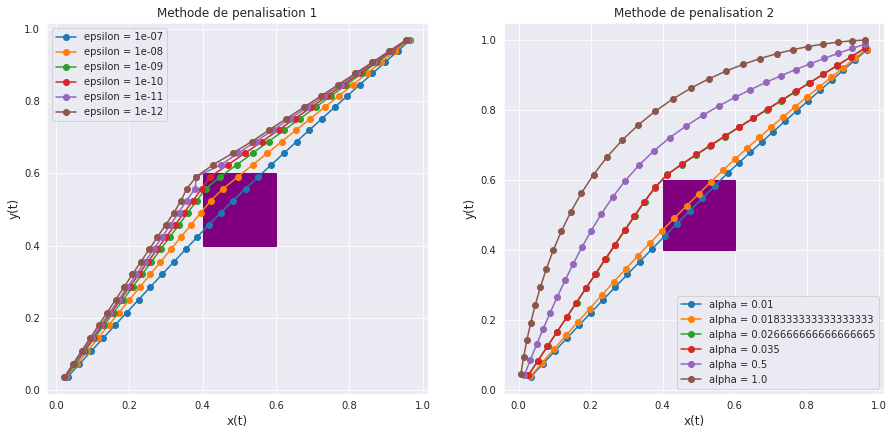

In [146]:
#Plots
Iter = 1000
tau = 0.01
eta = 1e-4
eps_list = np.array([1e-7,1e-8,1e-9,1e-10,1e-11,1e-12])
alph_list = np.concatenate((np.linspace(0.01,0.035,4),np.array([0.5]),np.array([1])))

c1 = plt.Rectangle((0.4,0.4),0.2,0.2,color='purple')
c2 = copy(c1)

fig = plt.figure(figsize=(15,15))

#subplot 1
ax1 = fig.add_subplot(221)
plt.xlabel('x(t)',size = 12)
plt.ylabel('y(t)',size = 12)
plt.title('Methode de penalisation 1')
ax1.add_artist(c1)
for eps in eps_list:
    xs,ys,count = penalisation1(x_knot,y_knot,grad_C1,eps,tau,eta,Iter)
    ax1.plot(xs,ys,label='epsilon = {}'.format(eps),marker='o')
ax1.legend()

#subplot 2
ax2 = fig.add_subplot(222)
plt.xlabel('x(t)',size = 12)
plt.ylabel('y(t)',size = 12)
plt.title('Methode de penalisation 2')
ax2.add_artist(c2)
for alph in alph_list:
    xs,ys,count = penalisation2(x_knot,y_knot,grad_C2,alph,tau,eta,Iter)
    ax2.plot(xs,ys,label='alpha = {}'.format(alph),marker='o')
plt.legend()

plt.show()

### Ajout d'un autre obstacle

Dans cette partie nous allons faire la minimisation du chemin avec un cercle et un rectangle

In [147]:
def shortest_path_pen1(x0,y0,eps1,eps2,tau,eta,IterMax):
    #computing the gradients
    r = 0.1
    b = 0.85
    a = 0.6
    n = len(x0)
    h = 1/n
    def grad_Rect(x,y):
        Grd_Rect = np.zeros((2,n))
        for i in range(n):
            f_rect = max(0,x[i]-0.2)*min(0,x[i]-0.4)*max(0,y[i])*min(0,y[i]-0.4)
            Grd_Rect[0][i] = (h/2)*2*min(0,x[i]-0.4)*max(0,y[i])*min(0,y[i]-0.4)*f_rect
            Grd_Rect[1][i] = (h/2)*2*max(0,y[i])*max(0,x[i]-0.2)*min(0,x[i]-0.4)*f_rect
        return Grd_Rect
    
    def grad_Cer(x,y):
        Grd_Cer = np.zeros((2,n))
        f_cercle = (r**2) - ((x[i]-a)**2) - ((y[i]-b)**2)
        Grd_Cer[0] = (h/2)*2*max(0,f_cercle)*max(0,(-2*(x[i]-a)))
        Grd_Cer[1] = (h/2)*2*max(0,f_cercle)*max(0,(-2*(y[i]-b)))
        return Grd_Cer
        
    #gradient descent
    x = x0
    y = y0
    n = len(x)
    gradient = grad_H(x,y) + (1/eps1)*grad_Cer(x,y) + (1/eps2)*grad_Rect(x,y)
    counter = 0
    while LA.norm(gradient)>eta and counter<IterMax:
        #import ipdb;ipdb.set_trace()
        x = x-tau*gradient[0]
        y = y - tau*gradient[1]
        gradient = grad_H(x,y) + (1/eps1)*grad_Cer(x,y) + (1/eps2)*grad_Rect(x,y)
        counter+=1
    return x,y,counter

In [148]:
def shortest_path_pen2(x0,y0,alph,beta,tau,eta,IterMax):
    #computing the gradients
    r = 0.1
    b = 0.85
    a = 0.6
    n = len(x0)
    h = 1/n
    def grad_Rect(x,y):
        Grd_Rect = np.zeros((2,n))
        for i in range(n):
            temp = (0.2-x[i])*(x[i]-0.4) + (-y[i])*(y[i]-0.4)
            Grd_Rect[0][i] = (h/2)*(-(x[i]-0.4) + (0.2-x[i]))/temp
            Grd_Rect[1][i] = (h/2)*(-(y[i]-0.4)+ (-y[i]))/temp
        return Grd_Rect
    
    def grad_Cer(x,y):
        Grd_Cer = np.zeros((2,n))
        f_cercle = ((x-a)**2) + ((y-b)**2) - (r**2) 
        Grd_Cer[0] = (h/2)*((2*(x-a))/f_cercle)
        Grd_Cer[1] = (h/2)*((2*(y-b))/f_cercle)
        return Grd_Cer
        
    #gradient descent
    x = x0
    y = y0
    n = len(x)
    gradient = grad_H(x,y) - alph*grad_Cer(x,y) - beta*grad_Rect(x,y)
    counter = 0
    while LA.norm(gradient)>eta and counter<IterMax:
        #import ipdb;ipdb.set_trace()
        x = x-tau*gradient[0]
        y = y - tau*gradient[1]
        gradient = grad_H(x,y) - alph*grad_Cer(x,y) - beta*grad_Rect(x,y)
        counter+=1
    return x,y,counter

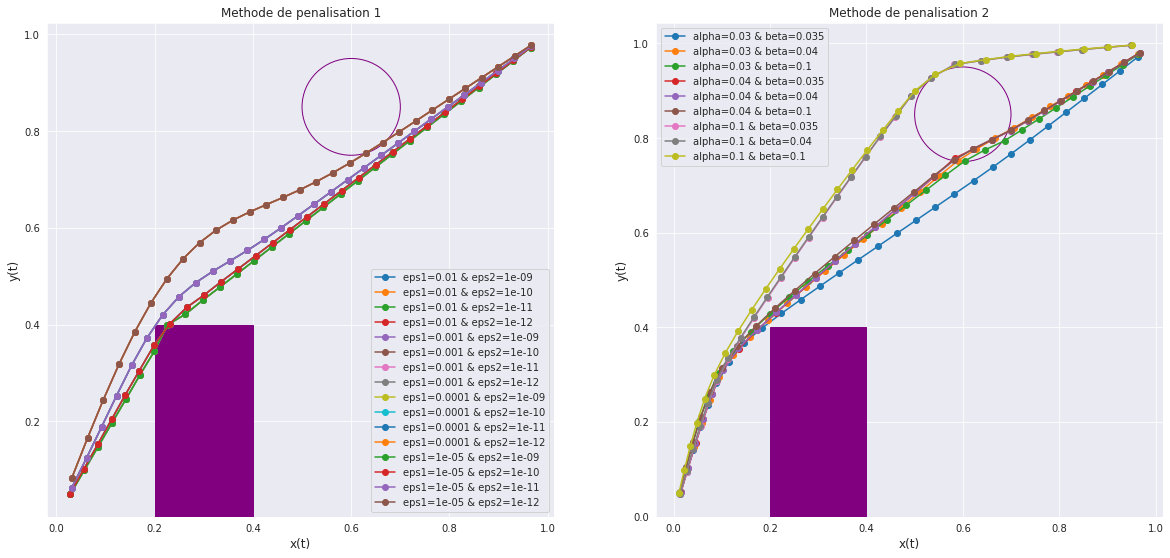

In [149]:
#Plots
Iter = 2000
tau = 0.01
eta = 1e-4
eps1_list = np.array([1e-2,1e-3,1e-4,1e-5])
eps2_list = np.array([1e-9,1e-10,1e-11,1e-12])
alpha_list = np.array([0.03,0.04,0.1])
beta_list = np.array([0.035,0.04,0.1])
circle = mpatches.Circle((0.6,0.85),radius = 0.1,fill=False,color='purple')
circle2 = copy(circle)
c1 = plt.Rectangle((0.2,0.0),0.2,0.4,color='purple')
c2 = copy(c1)

#cc2_x2,cc2_y2,co = penalisation2(x_knot,y_knot,grad_Obs2,0.025,tau,eta,Iter)
#cc2_x3,cc2_y3,co = penalisation2(x_knot,y_knot,grad_Obs2,0.5,tau,eta,Iter)

fig = plt.figure(figsize=(20,20))
#subplot 1
ax1 = fig.add_subplot(221)
ax1.add_artist(circle2)
ax1.add_artist(c2)
plt.xlabel('x(t)',size = 12)
plt.ylabel('y(t)',size = 12)
plt.title('Methode de penalisation 1')
for eps1 in eps1_list:
    for eps2 in eps2_list:
        cc1_x,cc1_y,co = shortest_path_pen1(x_knot,y_knot,eps1,eps2,tau,eta,Iter)
        ax1.plot(cc1_x,cc1_y,label='eps1={} & eps2={}'.format(eps1,eps2),marker='o')

ax1.legend()

#subplot 2
ax2 = fig.add_subplot(222)
ax2.add_artist(circle)
ax2.add_artist(c1)
plt.xlabel('x(t)',size = 12)
plt.ylabel('y(t)',size = 12)
plt.title('Methode de penalisation 2')
for alph in alpha_list:
    for beta in beta_list:
        cc2_x,cc2_y,co = shortest_path_pen2(x_knot,y_knot,alph,beta,tau,eta,Iter)
        ax2.plot(cc2_x,cc2_y,label='alpha={} & beta={}'.format(alph,beta),marker='o')

ax2.legend()

plt.show()